In [31]:
import os, pdb
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MultipleLocator, ScalarFormatter

In [32]:
import colossus
import colossus.halo
from colossus.halo import mass_defs, concentration
from colossus.halo import mass_adv
from colossus.lss import mass_function
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18')

In [77]:
import numpy.ma as ma
import csv

In [19]:
def mhalo_relations(mvir, halodef='200c', redshift=0.0):
    conc = concentration.concentration(mvir, 'vir', redshift)
    mnew, Rnew, cnew = mass_defs.changeMassDefinition(mvir, conc, redshift, 'vir', halodef)
    return np.log10(mnew)

In [20]:
def qa_mhalo_relations(minmass=11, maxmass=15.3, dm=0.1):
    logmvir = np.arange(minmass, maxmass, dm)
    mvir = 10**logmvir
    
    logm200c = mhalo_relations(mvir, '200c')
    logm500c = mhalo_relations(mvir, '500c')
    
    logm200m = mhalo_relations(mvir, '200m')
    logm500m = mhalo_relations(mvir, '500m')
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(logmvir, logm200c, 'blue', lw=2, alpha=0.5, ls='-', label='M(200c)')
    ax.plot(logmvir, logm500c, 'orange', lw=2, ls='--', label='M(500c)')
    ax.plot(logmvir, logm200m, 'red', lw=2, ls='-.', label='M(200m)')
    ax.plot(logmvir, logm500m, 'black', lw=2, ls=':', label='M(500m)')
    ax.plot(logmvir, logmvir, 'gray', alpha=0.5, ls='-', label='1-1 relation')
    
    ax.set_xlabel(r'$\log(M_{{virial}})$', fontsize=12)
    ax.set_ylabel(r'$\log(M_{{halo}})$', fontsize=12)
    ax.set_title('Comparing Halo Mass Definitions')
    ax.set_xlim(minmass, maxmass-dm)
    ax.set_ylim(minmass, maxmass-dm)
    ax.margins(0)
    ax.legend(loc='upper left')
    #plt.savefig('DMH1')

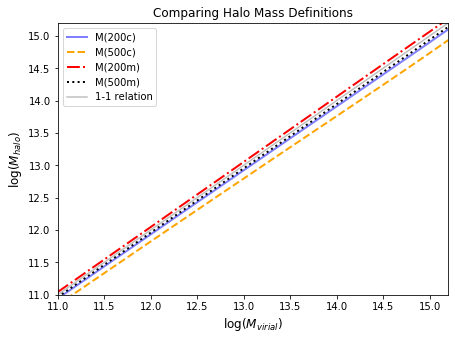

In [27]:
qa_mhalo_relations()

In [52]:
def residual(minmass=11, maxmass=15.3, dm=0.1):
    logmvir = np.arange(minmass, maxmass, dm)
    mvir = 10**logmvir
    
    logm200c = mhalo_relations(mvir, '200c')
    logm500c = mhalo_relations(mvir, '500c')
    
    logm200m = mhalo_relations(mvir, '200m')
    logm500m = mhalo_relations(mvir, '500m')
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(logmvir, logm200c-logmvir, 'blue', lw=2, alpha=0.5,ls='-', label='M(200c)')
    ax.plot(logmvir, logm500c-logmvir, 'orange', lw=2, ls='--', label='M(500c)')
    ax.plot(logmvir, logm200m-logmvir, 'red', lw=2, ls='-.', label='M(200m)')
    ax.plot(logmvir, logm500m-logmvir, 'black', lw=2, ls=':', label='M(500m)')
    ax.plot(logmvir, logmvir*0, 'gray', alpha=0.5, ls='-', label='1-1 relation')
    
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlim(minmass, maxmass-dm)
    ax.set_xlabel(r'$\log(M_{{virial}})$', fontsize=12)
    ax.set_ylabel('Residuals', fontsize=12 )
    ax.set_title('Residuals for Halo Masses')
    ax.margins(0)
    ax.legend(loc='upper left')
    plt.savefig('DMH2')
    print(np.mean(logm200c-logmvir))
    print(np.mean(logm500c-logmvir))
    print(np.mean(logm200m-logmvir))
    print(np.mean(logm500m-logmvir))
    plt.show()

-0.08042793469966249
-0.21237819454867327
0.05353351769807519
-0.04876947628997807


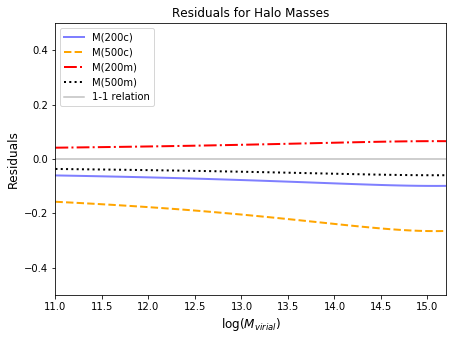

In [53]:
residual()

In [ ]:
def error(minmass=11, maxmass=15.3, dm=0.1):
    logmvir = np.arange(minmass, maxmass, dm)
    mvir = 10**logmvir
    
    logm200c = mhalo_relations(mvir, '200c')
    logm500c = mhalo_relations(mvir, '500c')
    
    logm200m = mhalo_relations(mvir, '200m')
    logm500m = mhalo_relations(mvir, '500m')
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(logmvir, logmvir, 'black', ls='-', label='1-1 relation')
    #ax.fill_between(logmvir, logm200c-0.08, logm200c+0.08, color='blue', label='M(200c)')
    ax.fill_between(logmvir, logm500c-0.2, logm500c+0.2, 
                    color='tan', label='M(500c)')
    ax.fill_between(logmvir, logm200c-0.08, logm200c+0.08, 
                    color='blue', label='M(200c)')
    ax.fill_between(logmvir, logm200m-0.05, logm200m+0.05, 
                    color='red', label='M(200m)')
    ax.fill_between(logmvir, logm500m-0.05, logm500m+0.05, 
                    color='plum', label='M(500m)')

    ax.set_xlabel(r'$\log(M_{{virial}})$', fontsize=12)
    ax.set_ylabel(r'$\log(M_{{halo}})$', fontsize=12)
    ax.set_title('Comparing Halo Mass Definitions')
    ax.set_xlim(minmass, maxmass-dm)
    ax.set_ylim(minmass, maxmass-dm)
    ax.margins(0)
    ax.legend(loc='upper left')
    #plt.savefig('DMH3')    

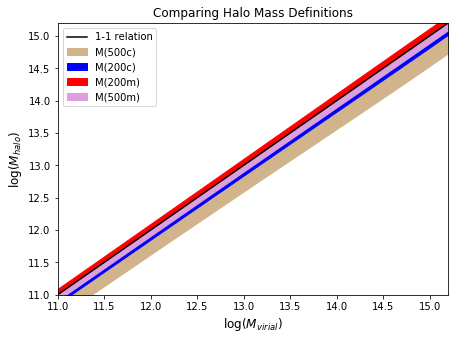

In [49]:
# error()

In [47]:
def comp_masses(minmass=11, maxmass=15.3, dm=0.1):
    logmvir = np.arange(minmass, maxmass, dm)
    mvir = 10**logmvir
    
    logm200c = mhalo_relations(mvir, '200c')
    logm500c = mhalo_relations(mvir, '500c')
    
    logm200m = mhalo_relations(mvir, '200m')
    logm500m = mhalo_relations(mvir, '500m')
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(logmvir, logmvir, 'gray', ls='-', label='1-1 relation')
    ax.fill_between(logmvir, logm500c-0.2, logm200m+0.05, 
                    color='wheat', alpha=0.5, label='Residuals')
    ax.plot(logmvir, logm200c, 'blue', lw=2, ls='-', label='M(200c)')
    ax.plot(logmvir, logm500c, 'orange', lw=2, ls='--', label='M(500c)')
    ax.plot(logmvir, logm200m, 'red', lw=2, ls='-.', label='M(200m)')
    ax.plot(logmvir, logm500m, 'black', lw=2, ls=':', label='M(500m)')
    

    ax.set_xlabel(r'$\log(M_{{virial}})$', fontsize=12)
    ax.set_ylabel(r'$\log(M_{{halo}})$', fontsize=12)
    ax.set_title('Comparing Halo Mass Definitions')
    ax.set_xlim(minmass, maxmass-dm)
    ax.set_ylim(minmass, maxmass-dm)
    ax.margins(0)
    ax.legend(loc='upper left')
    plt.savefig('DMH4')

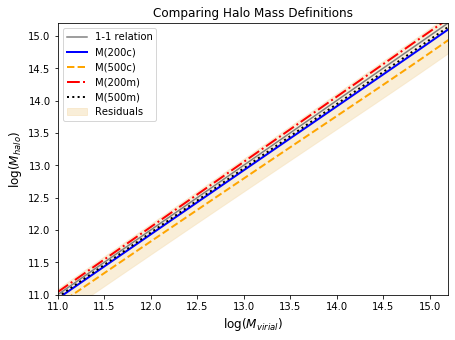

In [48]:
comp_masses()

In [7]:
from pandas._libs.tslibs.timestamps import Timestamp

In [29]:
# import ggplot

In [59]:
DMH4 = residual
summer2019chanuntorn
Name
Last Modified


DMH2 = comp_masses

In [73]:

img = 'DMH2.png'
img2 = 'DMH4.png'


In [74]:
residual

<function __main__.residual(minmass=11, maxmass=15.3, dm=0.1)>

In [75]:
imstack = []
imstack.append(img2)
imstack.append(img)
images = ma.mean(np.vstack([imstack]))
plt.plot(images)

TypeError: cannot perform reduce with flexible type

In [ ]:
# mvir=10**np.arange(11.0, 15.5, 0.3) # mass returns concentrations
# m1, m2, m3 =mass_defs.changeMassDefinition(mvir, 3.5, 0.0, 'vir', '200c')
# Change the spherical overdensity mass definition assuming a fixed density profile.
# mvir, halo concentration, red shift, vir, critical density